「論文名」の3章のデータ集計プログラムです。
Sci-Hubの2017年ダウンロードデータおよびUnpaywallのデータセットを元に分析しています。
あらかじめ各データをSQLで読み込み、かつSci-Hubのデータで日本からのダウンロードのデータはDOIをキーにUnpaywallのデータセットと結合しています。
+ データベース名：data_anlytics.db
+ テーブル名：scihub,oadoi,scihubjapanoadoi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import pickle


In [2]:
dbname = "data_anlytics.db"
conn = sqlite3.connect(dbname)
conn.row_factory = sqlite3.Row
c = conn.cursor()

In [3]:
df=pd.read_sql_query("select * from 'scihubjapanoadoi'", conn)

In [4]:
df

,date,doi,ip,cookie,country,city,latitude,longitude,doi:1,is_oa,...,best_oa_location_license,best_oa_location_evidence,title,journal_issns,journal_name,journal_is_oa,publisher,year,genre,updated
0,2017-01-01 00:20:40,10.1310/P4PC-KWCA-DVYU-H4FP,1010,1196,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2017-01-01 01:05:46,10.1042/bj20140312,2361,2993,Japan,Ōsaka-shi,34.6812614,135.5098009,10.1042/bj20140312,f,...,,,Autophagy is required and protects against apo...,"0264-6021,1470-8728",Biochemical Journal,f,Portland Press Ltd.,2014,journal-article,2017-11-16 08:52:39.292445
2,2017-01-01 01:11:15,10.1038/nphys1504,2491,3178,Japan,Iida-shi,35.5149777,137.8214466,10.1038/nphys1504,f,...,,,Isolated optical vortex knots,"1745-2473,1745-2481",Nature Physics,f,Springer Nature,2010,journal-article,2018-01-18 09:29:26.890805
3,2017-01-01 01:25:40,10.1097/YPG.0b013e32835d6fc6,2834,3669,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2017-01-01 01:31:57,10.1097/MED.0b013e32834c3c0b,2960,3857,Japan,Shinjuku-ku,35.6938401,139.7035494,None,None,...,None,None,None,None,None,None,None,None,None,None
5,2017-01-01 01:32:11,10.1021/jp212056s,2968,3866,Japan,Sendai-shi,38.2690761,140.8704029,10.1021/jp212056s,f,...,,,Molecular Structure of 3-Aminopropyltriethoxys...,"1932-7447,1932-7455",The Journal of Physical Chemistry C,f,American Chemical Society (ACS),2012,journal-article,2018-01-22 00:23:55.787509
6,2017-01-01 01:32:59,10.1016/B978-0-12-420138-5.00005-7,2979,3886,Japan,Nerima-ku,35.7356234,139.6516577,None,None,...,None,None,None,None,None,None,None,None,None,None
7,2017-01-01 01:41:01,10.1039/c4nr03857f,2968,3866,Japan,Sendai-shi,38.2690761,140.8704029,10.1039/c4nr03857f,f,...,,,Synthesis of boron and phosphorus codoped all-...,"2040-3364,2040-3372",Nanoscale,f,Royal Society of Chemistry (RSC),2014,journal-article,2018-01-18 14:14:57.671032
8,2017-01-01 01:43:19,10.1039/c5ra22733j,2968,3866,Japan,Sendai-shi,38.2690761,140.8704029,10.1039/c5ra22733j,f,...,,,Facile preparation of bridged silsesquioxane m...,2046-2069,RSC Adv.,f,Royal Society of Chemistry (RSC),2016,journal-article,2018-01-17 10:37:36.084574
9,2017-01-01 01:54:14,10.1007/s00590-014-1496-y,2960,3857,Japan,Shinjuku-ku,35.6938401,139.7035494,10.1007/s00590-014-1496-y,f,...,,,"Hypophosphatemic rickets: etiology, clinical f...","1633-8065,1432-1068",European Journal of Orthopaedic Surgery & Trau...,f,Springer Nature,2014,journal-article,2018-01-17 17:43:40.150237


In [5]:
df.shape

(1271346, 26)

In [8]:
df_cookie=df.groupby(["cookie"]).count()

In [10]:
df_cookie["doi"].describe()

count    357464.000000
mean          3.556571
std          32.610775
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        6831.000000
Name: doi, dtype: float64

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


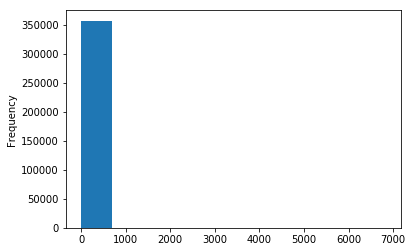

In [13]:
df_cookie["doi"].plot.hist()

In [28]:
df_cookie.query("doi==1")

,date,doi,ip,country,city,latitude,longitude,doi:1,is_oa,data_standard,...,best_oa_location_license,best_oa_location_evidence,title,journal_issns,journal_name,journal_is_oa,publisher,year,genre,updated
cookie,,,,,,,,,,,,,,,,,,,,,
10000089,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10000092,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10000093,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10000096,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10000103,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10000104,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10000114,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10000116,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10000117,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


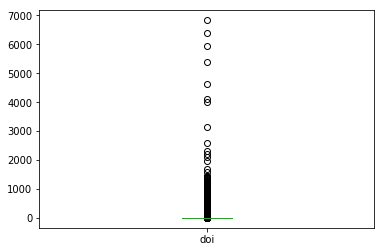

In [14]:
df_cookie["doi"].plot.box()

(array([  1.46385032e-03,   1.88410376e-07,   4.09587775e-08,
          1.63835110e-08,   4.09587775e-09,   4.09587775e-09,
          8.19175550e-09,   4.09587775e-09,   4.09587775e-09,
          8.19175550e-09]),
 array([  1.00000000e+00,   6.84000000e+02,   1.36700000e+03,
          2.05000000e+03,   2.73300000e+03,   3.41600000e+03,
          4.09900000e+03,   4.78200000e+03,   5.46500000e+03,
          6.14800000e+03,   6.83100000e+03]),
 <a list of 10 Patch objects>)

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


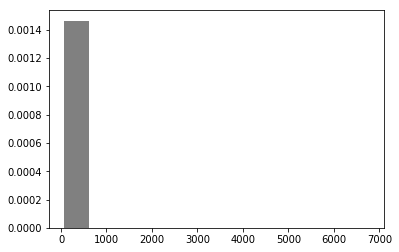

In [19]:
plt.hist(df_cookie["doi"], color='gray', rwidth=.8)


//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


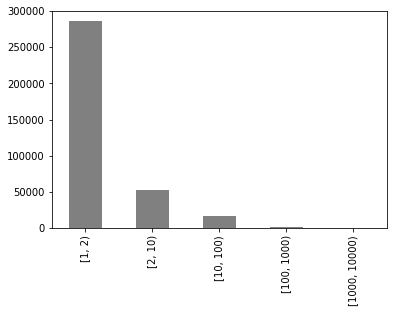

In [36]:
x=[1,2,10,100,1000,10000]
pd.cut(df_cookie["doi"], x, right=False).value_counts().sort_index().plot.bar(color='gray')

([<matplotlib.axis.XTick at 0x20460b14e0>,
 <a list of 6 Text xticklabel objects>)

//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


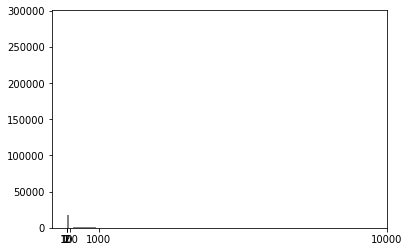

In [26]:
plt.hist(df_cookie["doi"] ,x, color='gray', rwidth=.8)
plt.xticks(x)

In [29]:
286090/357464

0.80033234115883

In [30]:
df_cookie.query("doi>=1000")

,date,doi,ip,country,city,latitude,longitude,doi:1,is_oa,data_standard,...,best_oa_location_license,best_oa_location_evidence,title,journal_issns,journal_name,journal_is_oa,publisher,year,genre,updated
cookie,,,,,,,,,,,,,,,,,,,,,
11313012,1393,1393,1393,1393,1393,1393,1393,1146,1146,1146,...,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146
117300,1070,1070,1070,1070,1070,1070,1070,865,865,865,...,865,865,865,865,865,865,865,865,865,865
1197999,1433,1433,1433,1433,1433,1433,1433,1208,1208,1208,...,1208,1208,1208,1208,1208,1208,1208,1208,1208,1208
1248026,1389,1389,1389,1389,1389,1389,1389,1235,1235,1235,...,1235,1235,1235,1235,1235,1235,1235,1235,1235,1235
1318147,1145,1145,1145,1145,1145,1145,1145,967,967,967,...,967,967,967,967,967,967,967,967,967,967
1321734,1002,1002,1002,1002,1002,1002,1002,902,902,902,...,902,902,902,902,902,902,902,902,902,902
1338458,1952,1952,1952,1952,1952,1952,1952,1540,1540,1540,...,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540
13664376,1116,1116,1116,1116,1116,1116,1116,939,939,939,...,939,939,939,939,939,939,939,939,939,939
1521364,5394,5394,5394,5394,5394,5394,5394,3509,3509,3509,...,3509,3509,3509,3509,3509,3509,3509,3509,3509,3509


//anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


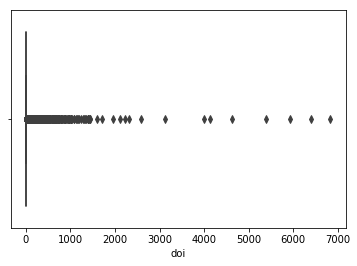

In [34]:
sns.boxplot(df_cookie["doi"])